<a href="https://colab.research.google.com/github/HridikaKP/sep9amds/blob/master/EMPLOY_ATTRITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting employee attrition helps companies identify employees at risk of leaving and take proactive measures to improve retention.

# **CLEANING AND PROCESSING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/mini project/Emp_attrition_csv.csv')

In [ ]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [ ]:
df.tail()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
74605,13450,44,Female,20,Healthcare,7578,Fair,Medium,Low,2,...,3,Mid,Large,52.0,No,No,No,Fair,Very High,Left
74606,2386,45,Male,26,Technology,8342,Excellent,Very High,Below Average,3,...,4,Mid,Medium,NaN,Yes,No,No,Poor,High,Stayed
74607,36968,28,Female,3,Technology,9763,Poor,Low,Average,0,...,3,Senior,Small,67.0,No,No,No,Poor,Medium,Left
74608,24276,37,Male,3,Education,3644,Fair,High,Average,2,...,4,Entry,Medium,16.0,No,No,No,Excellent,Medium,Stayed
74609,9839,38,Male,28,Media,6172,Good,High,High,0,...,2,Mid,Medium,84.0,No,No,No,Excellent,Low,Stayed


In [ ]:
df.sample()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
40337,57425,59,Female,26,Technology,9724,Poor,High,Average,1,...,3,Senior,Medium,60.0,Yes,No,Yes,Excellent,Medium,Stayed


In [ ]:
df.shape


(74610, 24)

In [ ]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


In [ ]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=74610, step=1)

In [ ]:
df.dtypes

,0
Employee ID,int64
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,int64


In [ ]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [ ]:
df.duplicated().sum()

112

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
mean_tenure = df['Company Tenure (In Months)'].mean()
df['Company Tenure (In Months)'] = df['Company Tenure (In Months)'].fillna(mean_tenure)

df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60.0,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20.0,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7.0,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5.0,No,No,No,Poor,High,Stayed


In [ ]:
Dfh=df['Distance from Home'].mean()
df['Distance from Home']=df['Distance from Home'].fillna(Dfh)
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60.0,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20.0,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7.0,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5.0,No,No,No,Poor,High,Stayed


In [ ]:
df.isna().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


**DROP COLUMNS**

In [ ]:
drop_columns = [
    'Employee Recognition', 'Employee ID', 'Company Size',
    'Performance Rating', 'Company Reputation', 'Job Satisfaction']
df.drop(columns=drop_columns, inplace=True)

In [ ]:
df.columns


Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Tenure (In Months)',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Attrition'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i,df[i].unique())

Age [31 59 24 36 56 38 47 48 57 30 29 40 19 33 49 51 39 54 23 45 42 53 37 34
 25 41 55 21 28 26 52 50 27 58 43 35 46 44 20 18 22 32]
Gender ['Male' 'Female']
Years at Company [19  4 10  7 41  3 23 16 44  1 12  6 38 22 30  9 37 33 13  5 21 32 34 11
  2 18 27 17 36  8 28 35 14 24 40 15 45 39 20 43 26 29 46 42 25 31 47 48
 49 50 51]
Job Role ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Monthly Income [ 5390  5534  8159 ... 11854 11558 12651]
Work-Life Balance ['Excellent' 'Poor' 'Good' 'Fair']
Number of Promotions [2 3 0 1 4]
Overtime ['No' 'Yes']
Distance from Home [22.      21.      11.      27.      71.      37.      75.       5.
 39.      57.      51.      26.      78.      30.      98.      48.
 17.      86.      60.      10.      18.      49.99208 92.      55.
 73.      38.      69.      53.       7.       6.      50.      94.
 54.       9.      87.      13.      65.      82.      15.      41.
 44.      29.      14.      32.      12.      43.      64.      20.
 70.     

In [ ]:
df.notna().sum()

,0
Age,74498
Gender,74498
Years at Company,74498
Job Role,74498
Monthly Income,74498
Work-Life Balance,74498
Number of Promotions,74498
Overtime,74498
Distance from Home,74498
Education Level,74498


In [ ]:
df['Education Level'].unique()

array(['Associate Degree', 'Masterâ€™s Degree', 'Bachelorâ€™s Degree',
       'High School', 'PhD'], dtype=object)

In [ ]:
df['Education Level'].unique()

array(['Associate Degree', 'Masterâ€™s Degree', 'Bachelorâ€™s Degree',
       'High School', 'PhD'], dtype=object)

In [ ]:
print(df.describe(include=['object']))

       Gender    Job Role Work-Life Balance Overtime      Education Level  \
count   74498       74498             74498    74498                74498   
unique      2           5                 4        2                    5   
top      Male  Technology              Good       No  Bachelorâ€™s Degree   
freq    40826       19322             28158    50157                22331   

       Marital Status Job Level Remote Work Leadership Opportunities  \
count           74498     74498       74498                    74498   
unique              3         3           2                        2   
top           Married     Entry          No                       No   
freq            37419     29780       60300                    70845   

       Innovation Opportunities Attrition  
count                     74498     74498  
unique                        2         2  
top                          No    Stayed  
freq                      62394     39128  


**LABELENCODE**

In [ ]:
le1=LabelEncoder()
df['Education Level']=le1.fit_transform(df['Education Level'])

le2=LabelEncoder()
df['Gender']=le2.fit_transform(df['Gender'])

le3=LabelEncoder()
df['Job Role']=le3.fit_transform(df['Job Role'])

le4=LabelEncoder()
df['Job Level']=le4.fit_transform(df['Job Level'])

le5=LabelEncoder()
df['Overtime']=le5.fit_transform(df['Overtime'])

le6=LabelEncoder()
df['Attrition']=le6.fit_transform(df['Attrition'])

le7=LabelEncoder()
df['Remote Work']=le7.fit_transform(df['Remote Work'])
le8=LabelEncoder()
df['Work-Life Balance']=le8.fit_transform(df['Work-Life Balance'])

le9=LabelEncoder()
df['Marital Status']=le9.fit_transform(df['Marital Status'])

le10=LabelEncoder()
df['Leadership Opportunities']=le10.fit_transform(df['Leadership Opportunities'])


le11=LabelEncoder()
df['Innovation Opportunities']=le11.fit_transform(df['Innovation Opportunities'])



# CHECKING CORRELEATION





In [ ]:
corr=df.corr()['Attrition']
corr

,Attrition
Age,0.050801
Gender,0.100637
Years at Company,0.065388
Job Role,0.010433
Monthly Income,0.010193
Work-Life Balance,-0.063416
Number of Promotions,0.081184
Overtime,-0.056019
Distance from Home,-0.092819
Education Level,0.051912


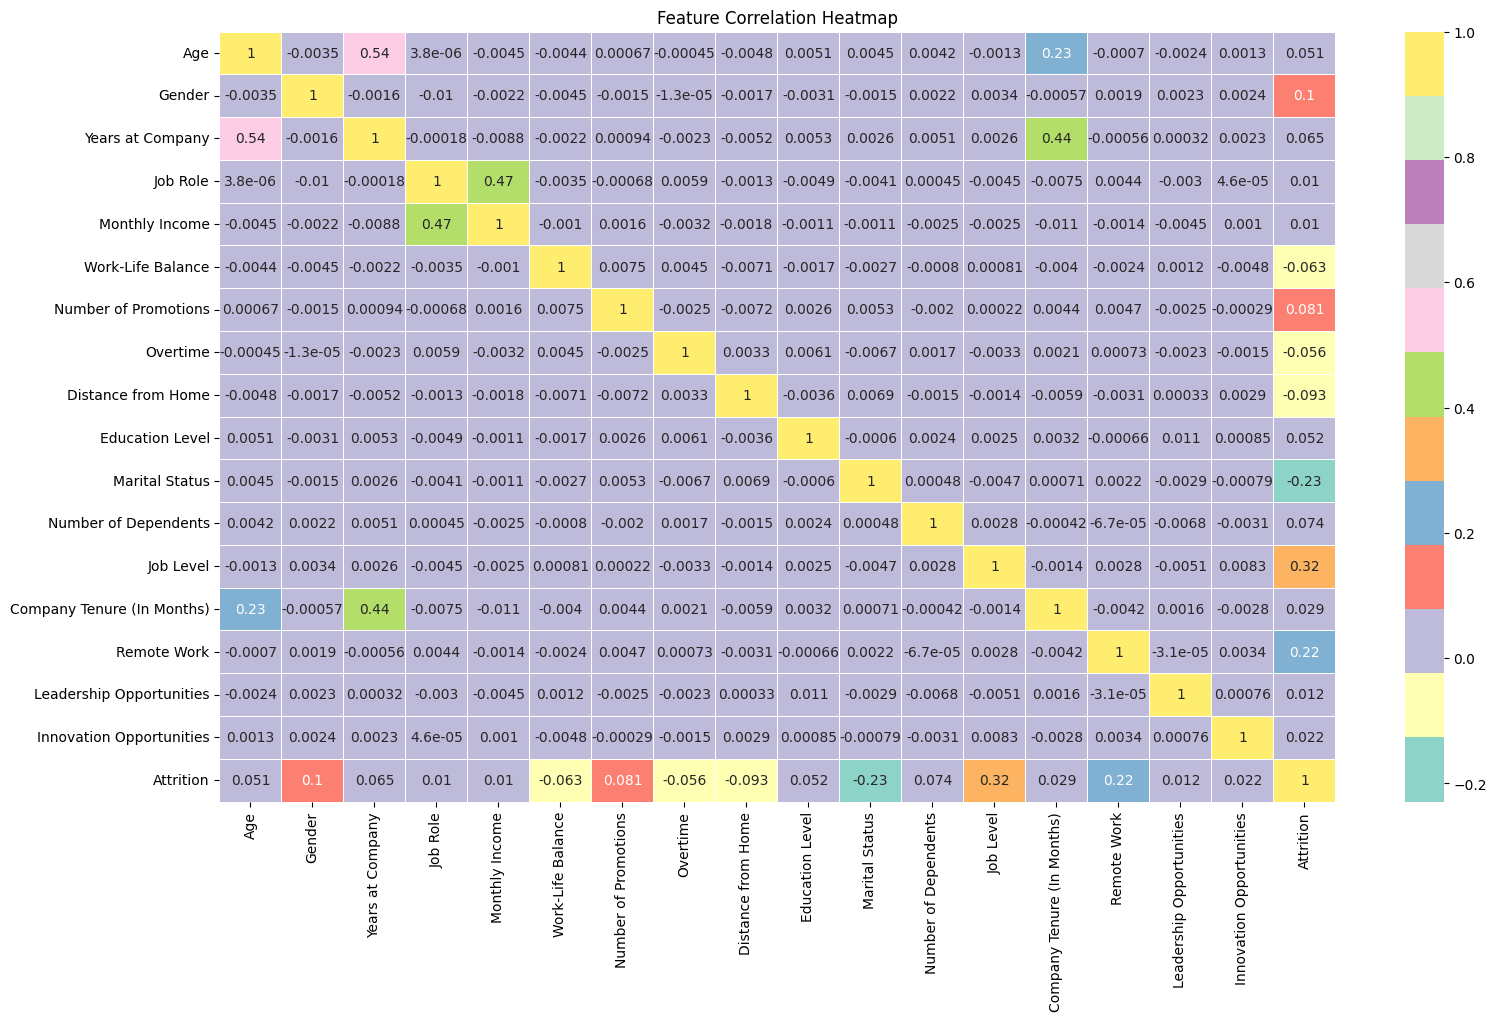

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='Set3')
plt.title("Feature Correlation Heatmap")
plt.show()



**Attrition count plot**

How many employs stayed or left

<ipython-input-27-dc657fea36d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attrition"], palette="Set2")


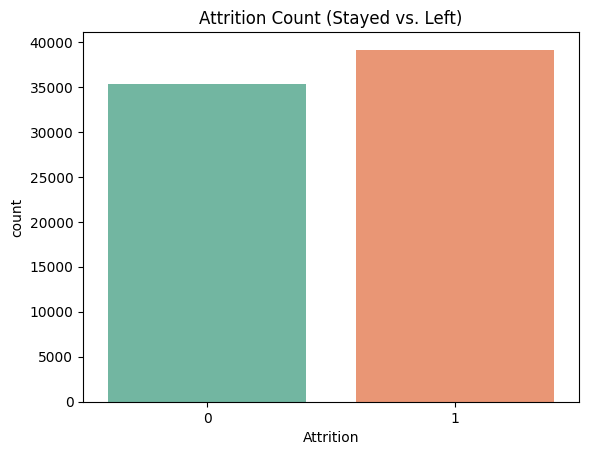

In [ ]:
sns.countplot(x=df["Attrition"], palette="Set2")
plt.title("Attrition Count (Stayed vs. Left)")
plt.show()

**Box plot**
Monthly income vs attrition



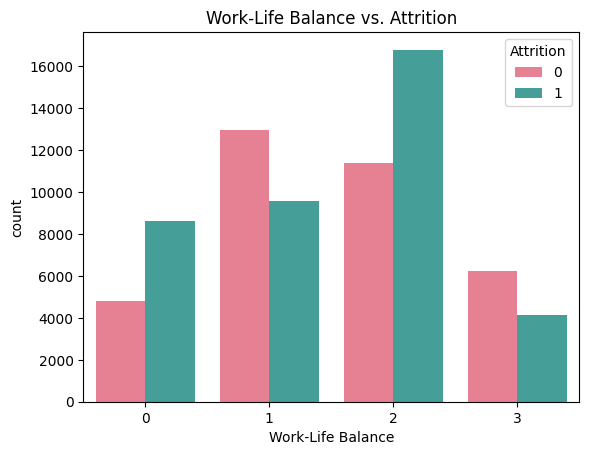

In [ ]:
sns.countplot(x=df["Work-Life Balance"], hue=df["Attrition"], palette="husl")
plt.title("Work-Life Balance vs. Attrition")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74498 entries, 0 to 74497
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         74498 non-null  int64  
 1   Gender                      74498 non-null  int64  
 2   Years at Company            74498 non-null  int64  
 3   Job Role                    74498 non-null  int64  
 4   Monthly Income              74498 non-null  int64  
 5   Work-Life Balance           74498 non-null  int64  
 6   Number of Promotions        74498 non-null  int64  
 7   Overtime                    74498 non-null  int64  
 8   Distance from Home          74498 non-null  float64
 9   Education Level             74498 non-null  int64  
 10  Marital Status              74498 non-null  int64  
 11  Number of Dependents        74498 non-null  int64  
 12  Job Level                   74498 non-null  int64  
 13  Company Tenure (In Months)  74498 no

**OUTLAYERS**

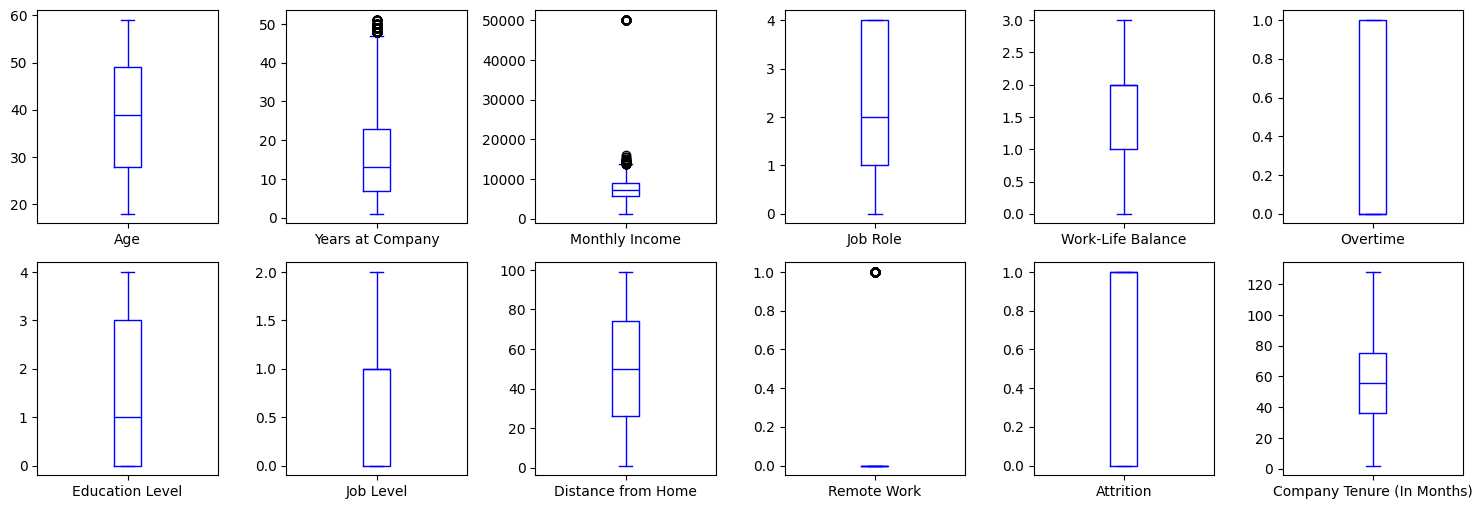

In [ ]:
df[["Age", "Years at Company", "Monthly Income",'Job Role','Work-Life Balance','Overtime','Education Level','Job Level', "Distance from Home",'Remote Work','Attrition',"Company Tenure (In Months)"]].plot(kind="box", subplots=True, layout=(4, 6), figsize=(15, 10), color="blue")

plt.tight_layout()
plt.show()

outlayer removing using iqr method

In [ ]:


# Define columns to remove outliers from
columns = ["Years at Company", "Monthly Income", "Remote Work"]

for col in columns:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(len(df),"\n",lower_bound,"\n",upper_bound)

print("Outliers removed!")


74160 
 -17.0 
 47.0
74009 
 816.0 
 13712.0
59893 
 0.0 
 0.0
Outliers removed!


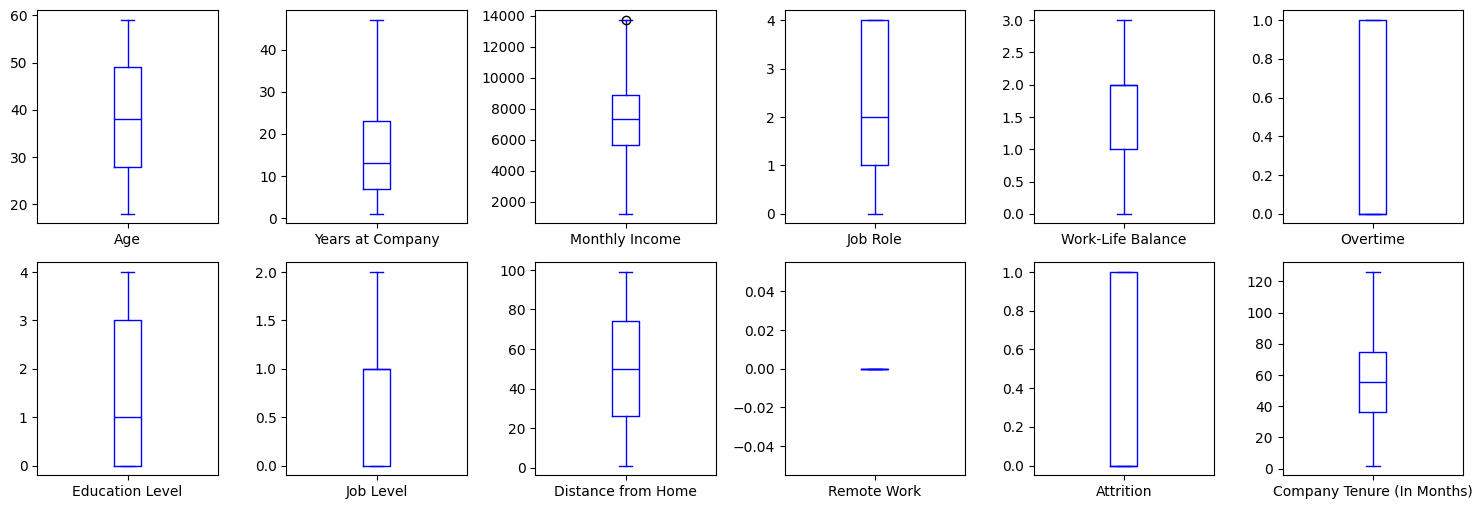

In [ ]:
df[["Age", "Years at Company", "Monthly Income",'Job Role','Work-Life Balance','Overtime','Education Level','Job Level', "Distance from Home",'Remote Work','Attrition',"Company Tenure (In Months)"]].plot(kind="box", subplots=True, layout=(4, 6), figsize=(15, 10), color="blue")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Number of Promotions,0
Overtime,0
Distance from Home,0
Education Level,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59893 entries, 0 to 74496
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         59893 non-null  int64  
 1   Gender                      59893 non-null  int64  
 2   Years at Company            59893 non-null  int64  
 3   Job Role                    59893 non-null  int64  
 4   Monthly Income              59893 non-null  int64  
 5   Work-Life Balance           59893 non-null  int64  
 6   Number of Promotions        59893 non-null  int64  
 7   Overtime                    59893 non-null  int64  
 8   Distance from Home          59893 non-null  float64
 9   Education Level             59893 non-null  int64  
 10  Marital Status              59893 non-null  int64  
 11  Number of Dependents        59893 non-null  int64  
 12  Job Level                   59893 non-null  int64  
 13  Company Tenure (In Months)  59893 no

In [ ]:
df.shape

(59893, 18)

#**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Attrition", axis=1)  # Features
y = df["Attrition"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train.value_counts()

,count
Attrition,
0,25283
1,22631


In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

In [ ]:
y_train_res.value_counts()

,count
Attrition,
0,25283
1,25283


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

#LOGISTIC REGREESION

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)


y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      6388
           1       0.66      0.69      0.68      5591

    accuracy                           0.69     11979
   macro avg       0.69      0.69      0.69     11979
weighted avg       0.69      0.69      0.69     11979



In [ ]:
train_accuracy = log_reg.score(X_train_res, y_train_res)
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.69
Test Accuracy: 0.69


# DESCION TREE

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)


y_pred_dt = dt.predict(X_test)


acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      6388
           1       0.62      0.64      0.63      5591

    accuracy                           0.65     11979
   macro avg       0.64      0.65      0.64     11979
weighted avg       0.65      0.65      0.65     11979



In [ ]:
train_accuracy = dt.score(X_train_res, y_train_res)
test_accuracy =dt.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.65


# PARAMETER TUNING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    n_iter=20,  # Number of random parameter settings to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_res, y_train_res)

# Evaluate the optimized model
train_accuracy = best_dt.score(X_train_res, y_train_res)
test_accuracy = best_dt.score(X_test, y_test)

print(f"Optimized Training Accuracy: {train_accuracy:.2f}")
print(f"Optimized Test Accuracy: {test_accuracy:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 8}
Optimized Training Accuracy: 0.74
Optimized Test Accuracy: 0.71


# RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_res, y_train_res)

train_acc_rf = rf.score(X_train_res, y_train_res)
test_acc_rf = rf.score(X_test, y_test)

print(f"Random Forest Training Accuracy: {train_acc_rf:.2f}")
print(f"Random Forest Test Accuracy: {test_acc_rf:.2f}")


Random Forest Training Accuracy: 0.76
Random Forest Test Accuracy: 0.72


In [ ]:
import pandas as pd
feature_importances = pd.Series(rf.feature_importances_, index=X_train_res.columns)
print(feature_importances.sort_values(ascending=False))


**PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=2, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42
)
random_search_rf.fit(X_train_res, y_train_res)

print("Best Hyperparameters:", random_search_rf.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 67}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use the best hyperparameters
best_rf = RandomForestClassifier(
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=9,
    min_samples_split=8,
    n_estimators=67,
    random_state=42
)

# Train the model
best_rf.fit(X_train_res, y_train_res)

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
train_accuracy = best_rf.score(X_train_res, y_train_res)
test_accuracy = best_rf.score(X_test, y_test)

print(f"Optimized Random Forest Training Accuracy: {train_accuracy:.2f}")
print(f"Optimized Random Forest Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Optimized Random Forest Training Accuracy: 0.80
Optimized Random Forest Test Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      6388
           1       0.70      0.73      0.71      5591

    accuracy                           0.73     11979
   macro avg       0.73      0.73      0.73     11979
weighted avg       0.73      0.73      0.73     11979



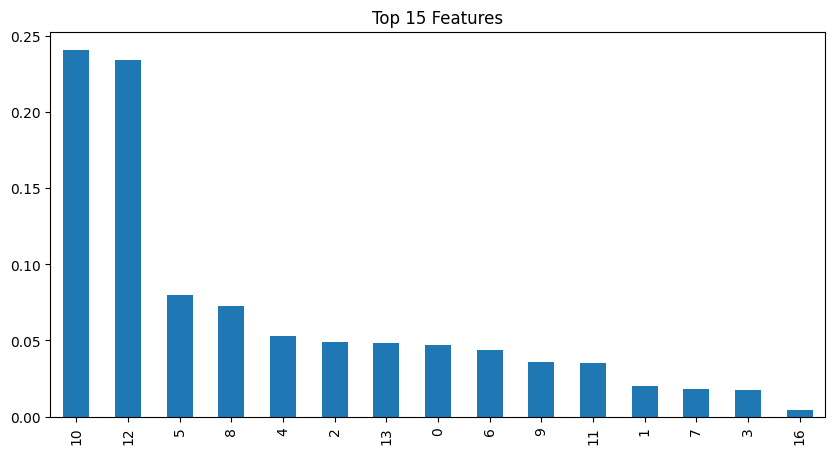

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train_res.columns)

# Plot top features
feature_importances.sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10,5), title="Top 15 Features")
plt.show()

# Optionally, drop low-importance features (set a threshold, e.g., < 0.005)
low_importance_features = feature_importances[feature_importances < 0.005].index

# Convert numerical indices to column names if needed
low_importance_features = X_train_res.columns[low_importance_features]

X_train_res_selected = X_train_res.drop(columns=low_importance_features)
X_test_selected = X_test.drop(columns=low_importance_features, errors='ignore') # Handle potential KeyError

# XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
# Assuming X_train is the original training data before any scaling or feature selection
selected_features = X_train_res_selected.columns  # Get the selected feature names (e.g., '0', '1', '2',...)

# Select the same features from X_test, but using numerical indices
X_test_selected = X_test.iloc[:, selected_features]

# Re-index X_test_selected to match the column names of X_train_res_selected if needed
X_test_selected.columns = X_train_res_selected.columns

# Train and evaluate XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.05, random_state=42)
xgb.fit(X_train_res_selected, y_train_res)

train_acc_xgb = xgb.score(X_train_res_selected, y_train_res)
test_acc_xgb = xgb.score(X_test_selected, y_test)  # Now X_test_selected has the correct features

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.05, random_state=42)
xgb.fit(X_train_res_selected, y_train_res)

# Evaluate XGBoost
train_acc_xgb = xgb.score(X_train_res_selected, y_train_res)
test_acc_xgb = xgb.score(X_test_selected, y_test)

print(f"XGBoost Training Accuracy: {train_acc_xgb:.2f}")
print(f"XGBoost Test Accuracy: {test_acc_xgb:.2f}")


XGBoost Training Accuracy: 0.82
XGBoost Test Accuracy: 0.73


**PARAMETER TUNING**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define hyperparameter search space
param_dist = {

    'n_estimators': randint(50, 140),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search
random_search_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)

random_search_xgb.fit(X_train_res_selected, y_train_res)

# Get best parameters
best_params_xgb = random_search_xgb.best_params_
print("Best XGBoost Hyperparameters:", best_params_xgb)

# Train with best parameters
best_xgb = XGBClassifier(**best_params_xgb, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train_res_selected, y_train_res)

# Evaluate
train_acc_best_xgb = best_xgb.score(X_train_res_selected, y_train_res)
test_acc_best_xgb = best_xgb.score(X_test_selected, y_test)

print(f"Optimized XGBoost Training Accuracy: {train_acc_best_xgb:.5f}")
print(f"Optimized XGBoost Test Accuracy: {test_acc_best_xgb:.5f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:01:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Hyperparameters: {'colsample_bytree': 0.6521211214797689, 'gamma': 0.2623782158161189, 'learning_rate': 0.09638900372842316, 'max_depth': 3, 'n_estimators': 108, 'reg_alpha': 0.3998609717152555, 'reg_lambda': 0.04666566321361543, 'subsample': 0.9868777594207296}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:01:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGBoost Training Accuracy: 0.73500
Optimized XGBoost Test Accuracy: 0.73211


In [ ]:

# Predict on the test set and compute the accuracy score
y_pred_test = best_xgb.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy (from accuracy_score): {test_accuracy:.5f}")

Test Accuracy (from accuracy_score): 0.73211


In [ ]:
# Get the classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report)

# Evaluate the model on training and testing data
train_acc_best_xgb = best_xgb.score(X_train_res_selected, y_train_res)
test_acc_best_xgb = best_xgb.score(X_test_selected, y_test)

print(f"Optimized XGBoost Training Accuracy: {train_acc_best_xgb:.5f}")
print(f"Optimized XGBoost Test Accuracy: {test_acc_best_xgb:.5f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      6388
           1       0.70      0.74      0.72      5591

    accuracy                           0.73     11979
   macro avg       0.73      0.73      0.73     11979
weighted avg       0.73      0.73      0.73     11979

Optimized XGBoost Training Accuracy: 0.73500
Optimized XGBoost Test Accuracy: 0.73211


**CROSS VALIDATION**

In [ ]:
# Get the cross-validation scores
cv_results = random_search_xgb.cv_results_

# Print cross-validation scores for each hyperparameter combination
print(f"Cross-validation scores: {cv_results['mean_test_score']}")
NNprint(f"Mean cross-validation score: {cv_results['mean_test_score'].mean():.5f}")

Cross-validation scores: [0.71728029 0.72418213 0.72681235 0.713681   0.72327245 0.71160453
 0.71520377 0.71255376 0.70687801 0.70976534 0.71985113 0.72275819
 0.71326571 0.72619928 0.72172991]
Mean cross-validation score: 0.71767


# KNN

In [ ]:
# Train
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.2f}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      6388
           1       0.63      0.66      0.64      5591

    accuracy                           0.66     11979
   macro avg       0.66      0.66      0.66     11979
weighted avg       0.66      0.66      0.66     11979



In [ ]:
train_accuracy = knn.score(X_train_res, y_train_res)
test_accuracy = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.78
Test Accuracy: 0.66


# NAVEBAYES

In [ ]:
# Train
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluate
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      6388
           1       0.68      0.69      0.69      5591

    accuracy                           0.71     11979
   macro avg       0.70      0.70      0.70     11979
weighted avg       0.71      0.71      0.71     11979



# LOGISTIC REGRESSION

In [ ]:
train_accuracy = log_reg.score(X_train_res, y_train_res)
test_accuracy = log_reg.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.69
Test Accuracy: 0.69


# SVC

In [ ]:
# Train
svm = SVC()
svm.fit(X_train_res, y_train_res)


y_pred_svm = svm.predict(X_test)


acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.2f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      6388
           1       0.67      0.74      0.70      5591

    accuracy                           0.71     11979
   macro avg       0.71      0.71      0.71     11979
weighted avg       0.71      0.71      0.71     11979



In [ ]:
train_accuracy = svm.score(X_train_res, y_train_res)
test_accuracy = svm.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.74
Test Accuracy: 0.71


# GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier()
gb.fit(X_train_res, y_train_res)

y_pred_gb = gb.predict(X_test)


acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {acc_gb:.2f}")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      6388
           1       0.70      0.74      0.72      5591

    accuracy                           0.73     11979
   macro avg       0.73      0.73      0.73     11979
weighted avg       0.73      0.73      0.73     11979



In [ ]:
train_accuracy = gb.score(X_train_res, y_train_res)
test_accuracy = gb.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.74
Test Accuracy: 0.73


**PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier

# Define random search space
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 10, 2),
    'min_samples_split': np.arange(2, 20, 5),
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(GradientBoostingClassifier(), param_dist,
                                   n_iter=5, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_res, y_train_res)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_gb_random = random_search.best_estimator_
y_pred_best_random = best_gb_random.predict(X_test)
print(f"Tuned Gradient Boosting Accuracy (Random Search): {accuracy_score(y_test, y_pred_best_random):.2f}")

Best Parameters: {'subsample': 0.6, 'n_estimators': 250, 'min_samples_split': 12, 'max_depth': 5, 'learning_rate': 0.01}
Tuned Gradient Boosting Accuracy (Random Search): 0.72


In [ ]:
# Train Final Model with Best Parameters
best_gb = GradientBoostingClassifier(
    subsample=0.6,
    n_estimators=150,
    min_samples_split=7,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

best_gb.fit(X_train_res, y_train_res)

# Predict on Test Data
y_pred_best = best_gb.predict(X_test)

# Evaluate Final Model
from sklearn.metrics import accuracy_score, classification_report

final_acc = accuracy_score(y_test, y_pred_best)
print(f"Final Tuned Gradient Boosting Accuracy: {final_acc:.2f}")
print(classification_report(y_test, y_pred_best))


Final Tuned Gradient Boosting Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      6388
           1       0.70      0.73      0.72      5591

    accuracy                           0.73     11979
   macro avg       0.73      0.73      0.73     11979
weighted avg       0.73      0.73      0.73     11979



In [ ]:
# Training Score
train_score = best_gb.score(X_train_res, y_train_res)

# Testing Score
test_score = best_gb.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.5f}")
print(f"Test Accuracy: {test_score:.5f}")



Training Accuracy: 0.73417
Test Accuracy: 0.73211


# GRADIENT BOOSTING

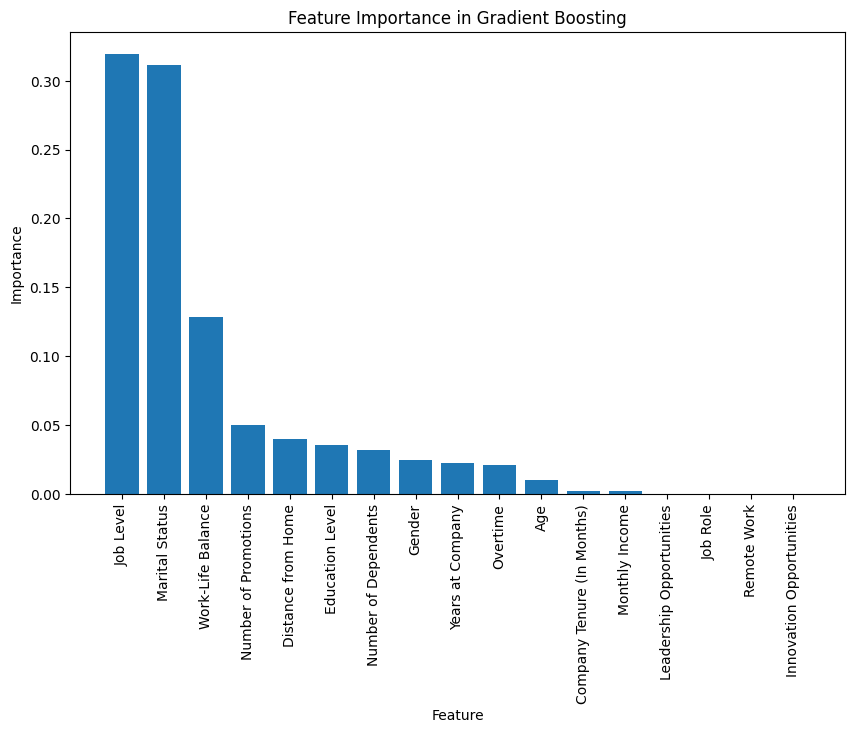

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.05, subsample=0.6, random_state=42)
gb.fit(X_train_res, y_train_res)

# Get feature importance
feature_importance = gb.feature_importances_

# Sort importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
# Access the column names from the original DataFrame 'X' before scaling
plt.xticks(range(len(feature_importance)), np.array(X.columns)[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Gradient Boosting")
plt.show()

In [ ]:
# Selecting only the important features (example)
selected_features = ['Job Level', 'Marital Status','Work-Life Balance', 'Number of Promotions', 'Distance from Home']

X_train_selected = X_train.loc[:,selected_features]
# Convert X_test back to DataFrame if needed
X_test_selected = pd.DataFrame(X_test, columns=X_train.columns).loc[:, selected_features]

# Train model again
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.6, random_state=42)
gb.fit(X_train_selected, y_train)

# Check new accuracy
train_acc = gb.score(X_train_selected, y_train)
test_acc = gb.score(X_test_selected, y_test)

print(f"Training Accuracy (After Feature Selection): {train_acc:.2f}")
print(f"Test Accuracy (After Feature Selection): {test_acc:.2f}")

Training Accuracy (After Feature Selection): 0.72
Test Accuracy (After Feature Selection): 0.51


# ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize AdaBoost with a Decision Tree as the base estimator
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
    n_estimators=150,  # Number of boosting rounds
    learning_rate=0.05,  # Shrinking factor
    random_state=42
)

# Train the model
adaboost.fit(X_train_selected, y_train)

# Predict on training and testing sets
y_train_pred_ada = adaboost.predict(X_train_selected)
y_test_pred_ada = adaboost.predict(X_test_selected)

# Compute accuracy
train_acc_ada = accuracy_score(y_train, y_train_pred_ada)
test_acc_ada = accuracy_score(y_test, y_test_pred_ada)

print(f"AdaBoost Training Accuracy: {train_acc_ada:.2f}")
print(f"AdaBoost Test Accuracy: {test_acc_ada:.2f}")




AdaBoost Training Accuracy: 0.69
AdaBoost Test Accuracy: 0.64


# **STREAMLIT**

In [ ]:
import pickle

In [ ]:
# import pickle

# pickle.dump(best_xgb,open('xgb_model.sav', 'wb'))


In [ ]:
import pickle
with open("optimized_random_forest.pkl", "wb") as file:
    pickle.dump(best_rf, file)


In [ ]:
pickle.dump(le1,open('le1.sav', 'wb'))

In [ ]:
pickle.dump(le2,open('le2.sav', 'wb'))

In [ ]:
pickle.dump(le3,open('le3.sav', 'wb'))

In [ ]:
pickle.dump(le4,open('le4.sav', 'wb'))

In [ ]:
pickle.dump(le5,open('le5.sav', 'wb'))

In [ ]:
pickle.dump(le6,open('le6.sav', 'wb'))

In [ ]:
pickle.dump(le7,open('le7.sav', 'wb'))

In [ ]:
pickle.dump(le8,open('le8.sav', 'wb'))

In [ ]:
pickle.dump(le9,open('le9.sav', 'wb'))

In [ ]:
pickle.dump(le10,open('le10.sav', 'wb'))

In [ ]:
pickle.dump(le11,open('le11.sav', 'wb'))

In [ ]:
pickle.dump(scaler,open('scaler.sav', 'wb'))